# Exercise sheet 4
**Hello everyone!**

**Points: 15**

Topics of this exercise sheet are:
* Working with seaborn
* Data visualization principles

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [ADAM](https://adam.unibas.ch/goto_adam_crs_1266890.html), [Piazza](https://piazza.com/class/kzy15kp8s5t6ku), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids22).

Please submit this exercise sheet on **ADAM**.
Naming conventions:
* Name of notebook: "Exercise sheet 4.ipynb"
* Please put it in a folder structure like this: "your_unibas_short_name/Exercise4/Exercise sheet 4.ipynb"
* You can find your unibas short name either...
    * by looking at the filename of the feedback on exercise sheet 2 (from ADAM)
    * or if you didn't submit exercise sheet 2, log in to viaweb.unibas.ch and you will see your unibas short name after the welcome message
* Then zip this folder and upload it on ADAM.

**Handout date**: 2022/03/28 <br>
**Submission date**: 2022/04/04 <br>
**Discussion date**: 2022/04/05

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

## 1 (5 points)

### 1a (1 point)
We will use data from [Kaggle](https://www.kaggle.com/datasets/prasertk/healthy-lifestyle-cities-report-2021) about different cities around the world.

In [2]:
cities = pd.read_csv("healthy_lifestyle_city_2021.csv")
cities.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53


First, let's clean this data a little.
* Replace the values in "Cost of a bottle of water(City)", "Sunshine hours(City)" and "Cost of a monthly gym membership(City)" with numerical values (hint: use the pandas functions .str and .as_type())
* Replace the values in "Obesity levels(Country)" to be numerical values. A value "20.40%" should be converted to "0.204".

In [3]:
cities["Cost of a bottle of water(City)"] = cities["Cost of a bottle of water(City)"].str[1:].astype(float)
cities["Obesity levels(Country)"] = cities["Obesity levels(Country)"].str[:-1].astype(float) / 100
cities["Cost of a monthly gym membership(City)"] = cities["Cost of a monthly gym membership(City)"].str[1:].astype(float)
cities["Sunshine hours(City)"] = cities["Sunshine hours(City)"].replace('-',np.NaN).astype(float)
cities.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,0.206,81.8,19.63,1452,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380,7.64,154,523,32.53


In [4]:
assert_is_instance(cities, pd.DataFrame)
assert_equal(len(cities), 44)
assert_almost_equal(cities.loc[(cities["City"] == "Vienna")]["Sunshine hours(City)"].values[0], 1884.0)
assert_almost_equal(cities.loc[(cities["City"] == "Stockholm")]["Cost of a bottle of water(City)"].values[0], 1.72)
assert_almost_equal(cities.loc[(cities["City"] == "Milan")]["Obesity levels(Country)"].values[0], 0.199)
assert_almost_equal(cities.loc[(cities["City"] == "New York")]["Cost of a monthly gym membership(City)"].values[0], 64.66)

### 1b (1 point)
What is the mean of the column "Obesity levels(Country)"?

In [5]:
mean_obesity_level = cities["Obesity levels(Country)"].mean()
mean_obesity_level

0.21925

In [6]:
### BEGIN HIDDEN TESTS 
assert_almost_equal(mean_obesity_level, 0.21925)
### END HIDDEN TESTS

### 1c (1 point)
Is the mean a good measure to summarize the values of "Obesity levels(Country)"?

<AxesSubplot:xlabel='Obesity levels(Country)', ylabel='Count'>

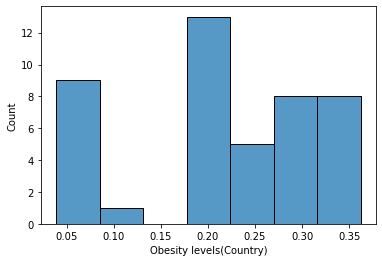

In [7]:
# a visualization might help...

sns.histplot(cities, x="Obesity levels(Country)")

The distribution is bimodal. The global mean doesn't take this into account.

### 1d (2 points)
Please make a new column called "Continent" containing the continent of each city. <br>
If a city is in multiple continents, choose one (it will make the following plots cleaner). <br>
Use this list of continent names: Europe, Australia, America, Asia, Antarctica, Oceania.

Hint: You can go two routes, find a different dataframe on the internet to join to this one (using the pandas function merge), or hand-code the information. Whichever is easier for you :)

In [8]:
cities["Continent"] = ["Europe", "Australia", "Europe", "Europe", "Europe", "Europe", "Asia", "Europe", "Europe", "America", "Australia", "Asia", "Asia", "America", "America", "Europe", "Asia", "Asia", "Europe", "Europe", "Asia", "Europe", "Africa", "Asia", "America", "Asia", "America", "Europe", "Asia", "America", "Asia", "Asia", "Europe", "America", "Europe", "America", "Europe", "Europe", "Africa", "Europe", "America", "America", "Europe", "America"]

In [9]:
assert_equal(cities.loc[(cities["City"] == "Vienna")]["Continent"].values[0], "Europe")
assert_equal(cities.loc[(cities["City"] == "Sydney")]["Continent"].values[0], "Australia")
assert_equal(cities.loc[(cities["City"] == "Johannesburg")]["Continent"].values[0], "Africa")
assert_equal(cities.loc[(cities["City"] == "Sao Paulo")]["Continent"].values[0], "America")
assert_equal(cities.loc[(cities["City"] == "Shanghai")]["Continent"].values[0], "Asia")

What does the column "Continent" have to do with question 1c? (Hint: This is pretty similar to the penguin flipper lengths from the lecture)

<AxesSubplot:xlabel='Obesity levels(Country)', ylabel='Count'>

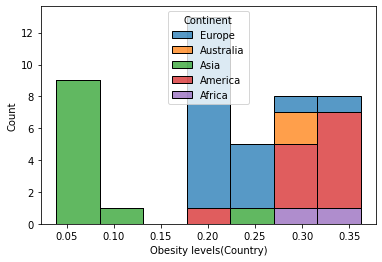

In [10]:
# a visualization might help...

### BEGIN SOLUTION
sns.histplot(cities, x="Obesity levels(Country)", hue="Continent", multiple="stack")
### END SOLUTION

We can now see that countries in Asia have very different obesity levels than countries in other continents. This means that we should take e.g. a mean per continent.

![](https://upload.wikimedia.org/wikipedia/commons/8/89/Melbourne_skyline_from_Williamstown.png)

## 2 (8 points)
You have gotten the job as data visualization expert in Melbourne. 🎉 Congratulations! <br>
Your first task is to make a stunning plot to convince everyone that Melbourne is the best city in the whole wide world! We want to print it on posters! Or at least in the national tourism brochure.

* Make **one plot** using any and all (evil) principles of data visualization. If you need inspiration, look at the examples on the lecture slides or here: https://www.youtube.com/watch?v=E91bGT9BjYk or google "misleading data visualization".
* If necessary, write (max) 3 sentences to explain your plot

## Gallery of Melbourne plots
This is a subjective choice of some of the funniest, coolest, most extravagant plots about Melbourne's many advantages. 🦘

Some plots will look not 100% as awesome here as on the submission because their code overrides the global plot settings.

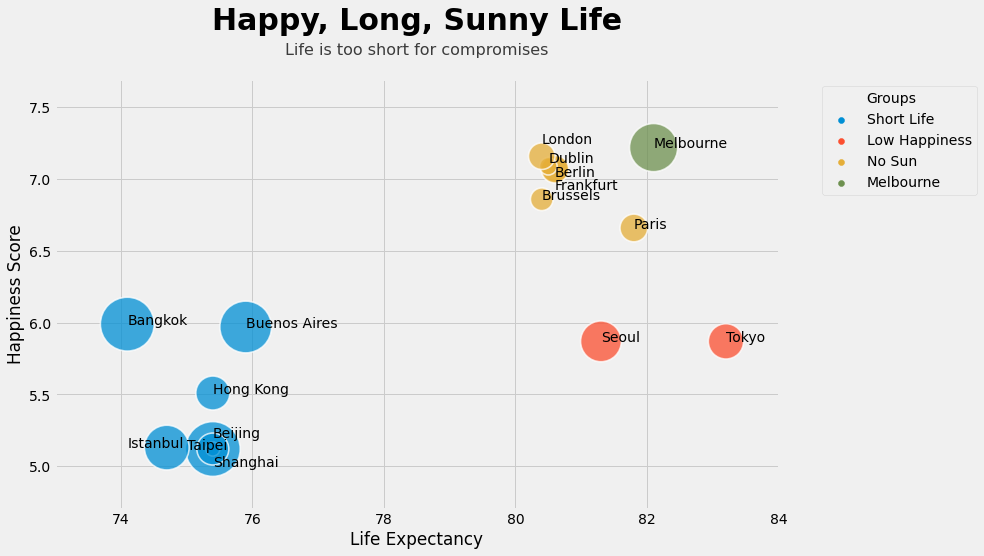

In [11]:
mel_lifexp = cities.at[10,'Life expectancy(years) (Country)']

mel_happy = cities.at[10,'Happiness levels(Country)']

mel_sunshine = cities.at[10,'Sunshine hours(City)']

plot_data1 = cities[cities['Life expectancy(years) (Country)'] <= (mel_lifexp - 5)]
plot_data2 = cities[cities['Sunshine hours(City)'] <= (mel_sunshine - 100)]
plot_data3 = cities[cities['Sunshine hours(City)'] == mel_sunshine]
plot_data4 = cities[cities['Sunshine hours(City)'] < (mel_sunshine - 700)]


plot_data = pd.concat([plot_data1, plot_data2], axis=0)
plot_data = plot_data[plot_data['Happiness levels(Country)'] <= (mel_happy - 1)]
plot_data = pd.concat([plot_data, plot_data4])
plot_data = plot_data[plot_data['Happiness levels(Country)'] <= 7.5]
plot_data = pd.concat([plot_data, plot_data3])
plot_data = plot_data.drop_duplicates("City")
plot_data = plot_data.drop(plot_data[plot_data['Life expectancy(years) (Country)'] < 72].index)

### creating groups

conditions = [
    (plot_data['City'] == 'Melbourne'),
    (plot_data['Life expectancy(years) (Country)'] < 80),
    (plot_data['Happiness levels(Country)'] < 6.5),
    (plot_data['Happiness levels(Country)'] > 6.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Melbourne', 'Short Life', 'Low Happiness', 'No Sun']

# create a new column and use np.select to assign values to it using our lists as arguments
plot_data['Groups'] = np.select(conditions, values)

plt.style.use('fivethirtyeight')

# plot
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(
    x = 'Life expectancy(years) (Country)',
    y = 'Happiness levels(Country)',
    size = 'Sunshine hours(City)',
    sizes = (200,3000),
    hue='Groups',
    alpha=0.75,
    legend='brief',
    data = plot_data,
    ax = ax
)

# make adjustments
ax.set_xlabel('Life Expectancy')
ax.set_ylabel('Happiness Score')
ax.set_xlim(73,84)
ax.set_ylim(4.7,7.7)


ax.text(x=0.5, y=1.1, s='Happy, Long, Sunny Life', fontsize=30, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Life is too short for compromises', fontsize=16, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:5],l[:5], bbox_to_anchor=(1.05, 1), loc=2)



Y = [None] * len(plot_data['Life expectancy(years) (Country)'])
#X = [] * len(plot_data['Life expectancy(years) (Country)'])
annotations = [] * len(plot_data['Life expectancy(years) (Country)'])

cities_plot = ['Beijing','Bangkok','Buenos Aires', 'Istanbul','Taipei','Hong Kong','Shanghai', 'Seoul','Tokyo','Berlin','Frankfurt','Dublin','Brussels','Paris','London','Melbourne']
X = [75.4, 74.1, 75.9,74.1,75, 75.4, 75.4, 81.3, 83.2, 80.6, 80.6, 80.5, 80.4, 81.8, 80.4,82.1]
Y = [5.2, 5.99, 5.97, 5.13, 5.12, 5.51, 5, 5.87, 5.87, 7.02,6.93, 7.12, 6.86, 6.66, 7.25, 7.22]



for i, label in enumerate(cities_plot):
    plt.annotate(label, (X[i], Y[i]))

fig.tight_layout()
plt.show()

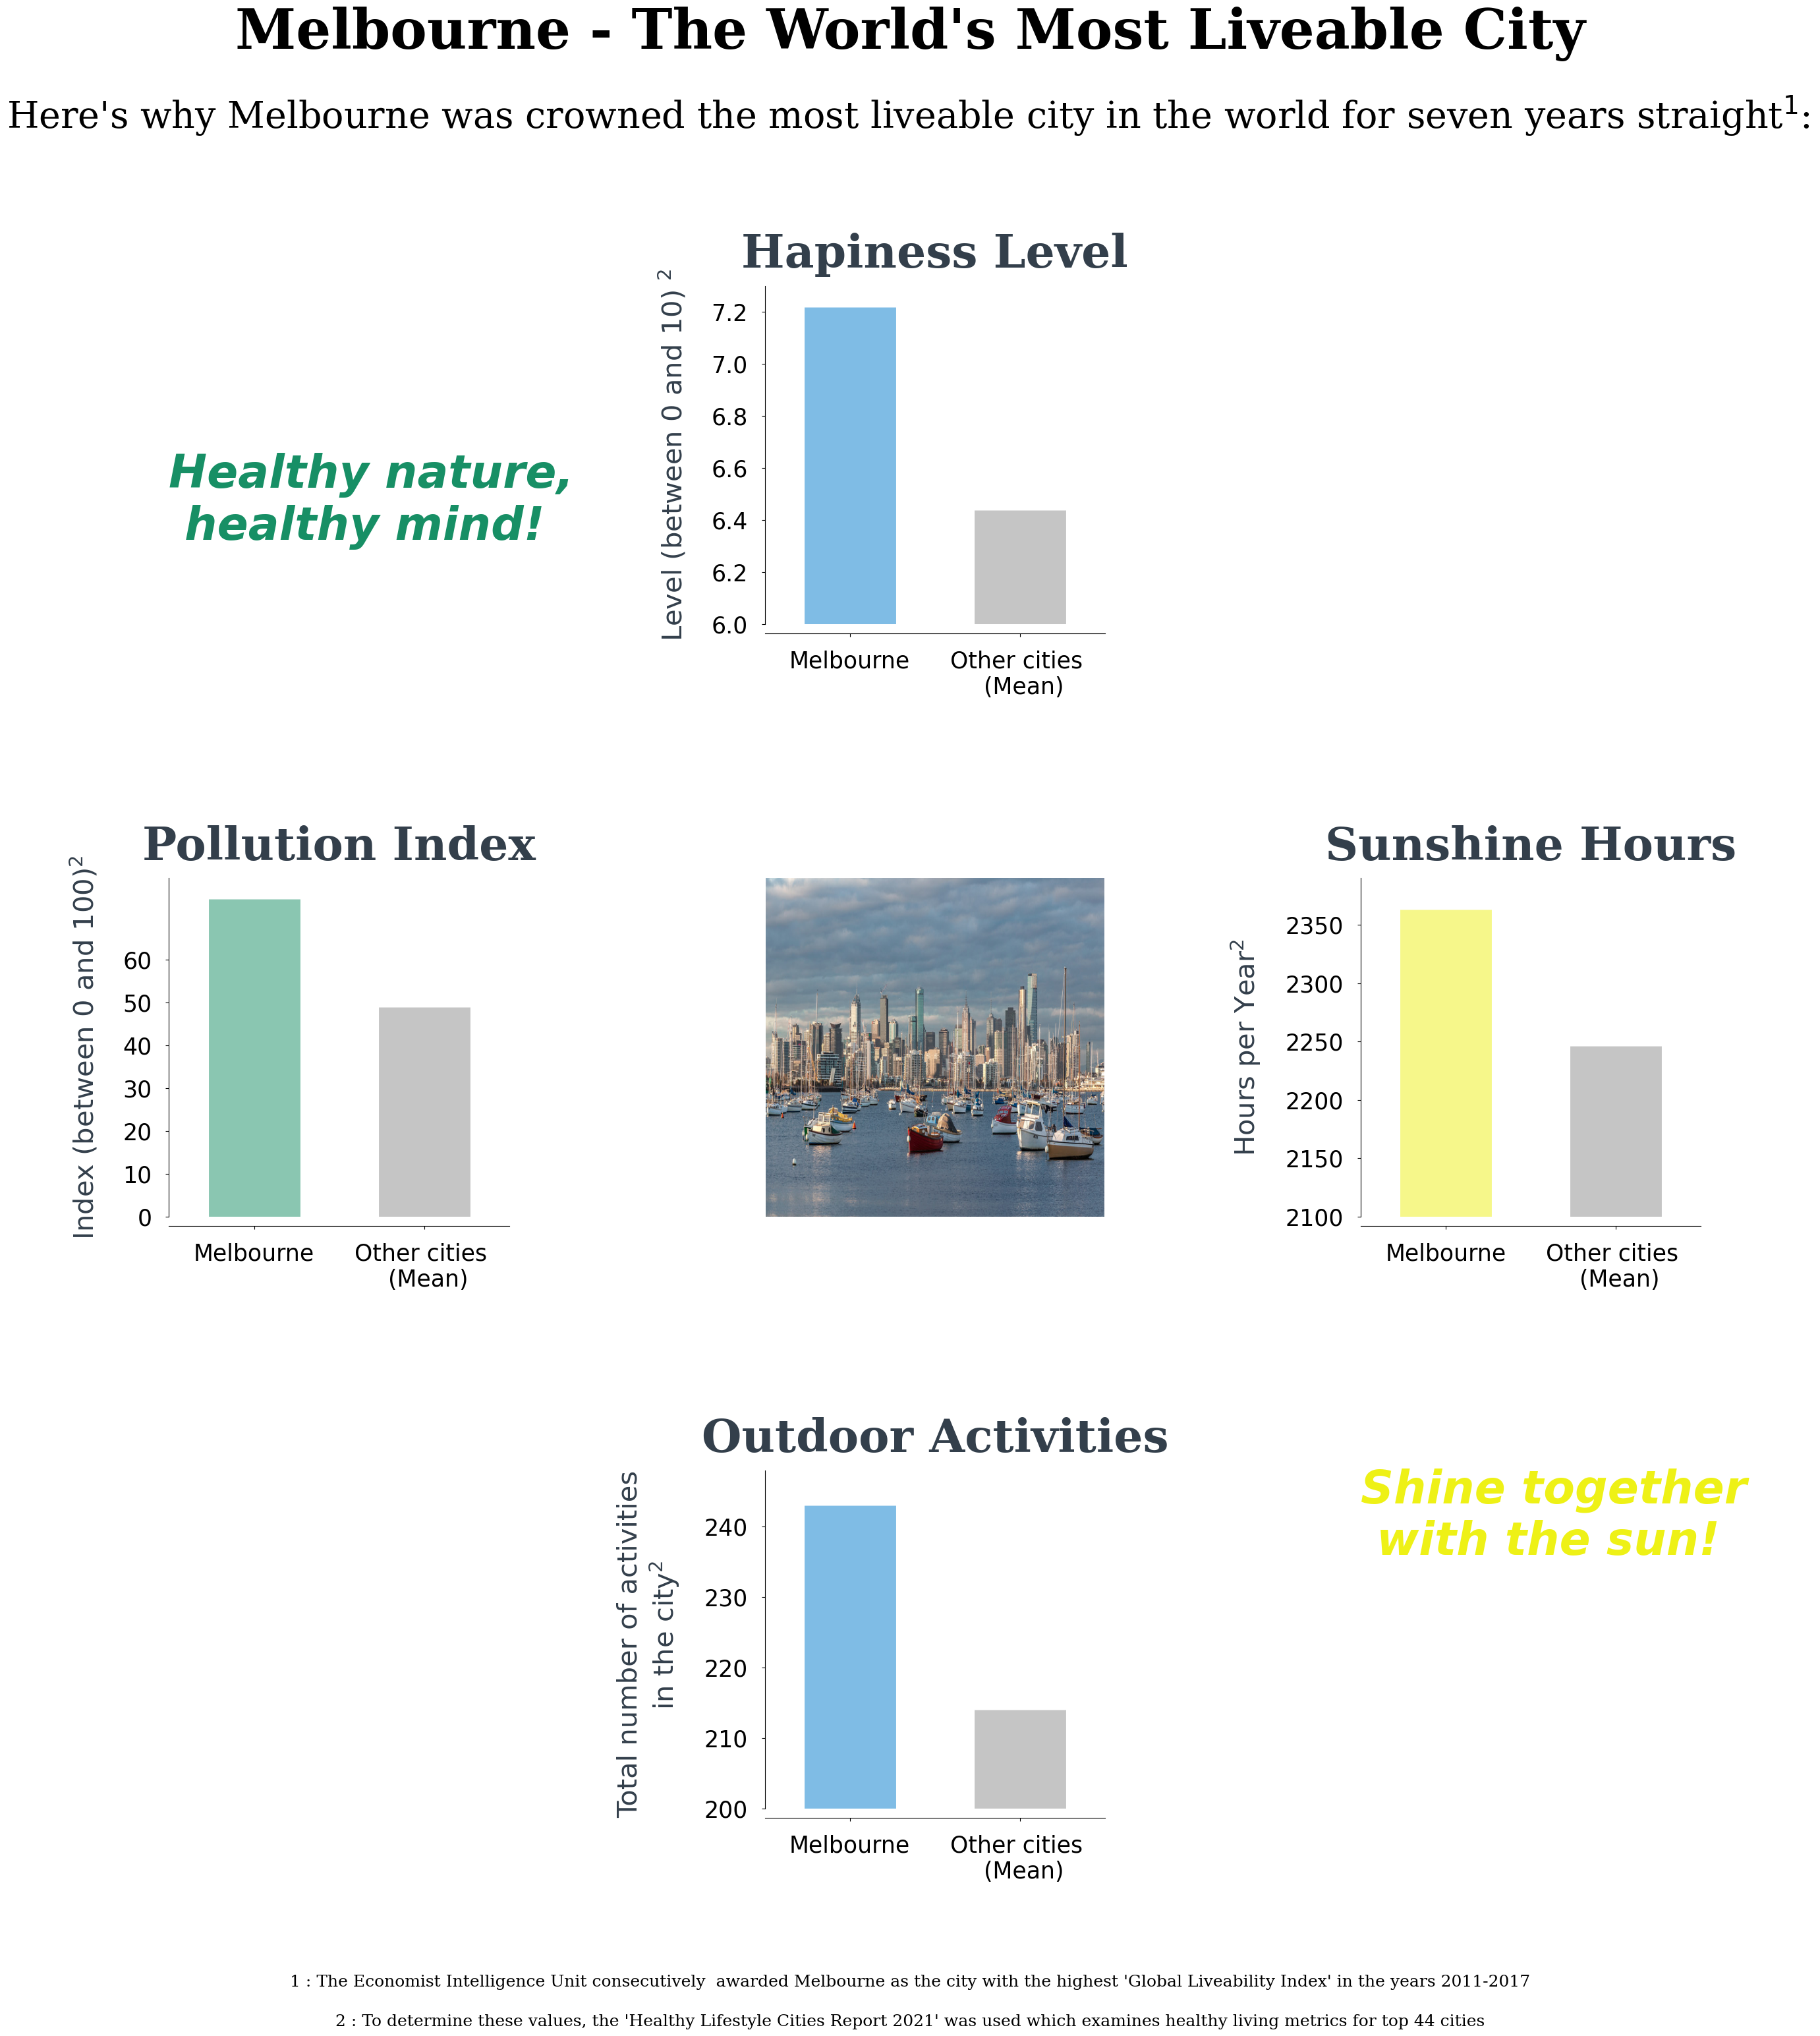

In [12]:
import matplotlib
import bs4
import html5lib
import PIL
import urllib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


cities['Pollution(Index score) (City)'].replace('-','NaN', inplace = True)
cities['Pollution(Index score) (City)'] = cities['Pollution(Index score) (City)'].astype(float)
cities['Annual avg. hours worked'].replace('-','NaN', inplace = True)
cities['Annual avg. hours worked'] = cities['Annual avg. hours worked'].astype(float)
cities['Pollution(Index score) (City)'] = cities['Pollution(Index score) (City)'].apply(lambda x : 100 - x)
cities_mean = cities.mean(numeric_only = True)
cities_mean  = cities_mean[1:11].round(2)

melbourne = cities[cities['City'] == 'Melbourne']
melbourne = melbourne.iloc[0,2:-1]

df = pd.DataFrame(data=[melbourne, cities_mean], index = ['Melbourne', 'Mean'])


fig = plt.figure(figsize = [30,30])

spec= matplotlib.gridspec.GridSpec(3,3, fig, hspace = 0.75, wspace = 0.75)

title_font = {'fontname':'serif'}
label_font = {'fontname':'sans serif'}

ax1 = fig.add_subplot(spec[0,1])
plt.vlines(x = [0.25,0.75], ymin = [6,6], ymax = df['Happiness levels(Country)'],  color=['#007ACC','#8D8D8D'], 
           alpha=0.5, linewidth=100)
ax1.set_xlim([0,1])
ax1.set_ylim([6, 7.3])
ax1.spines[['top','right']].set_visible(False)
ax1.set_title('Hapiness Level', fontsize = 50,**title_font, fontweight='black', color='#333F4B', pad= 20)
ax1.tick_params(axis='both', which='major', labelsize=25, pad = 15)
plt.xticks(ticks = [0.25, 0.75], labels = ['Melbourne', 'Other cities \n (Mean)'], **label_font)
ax1.spines['bottom'].set_position(('outward', 10))
ax1.set_ylabel('Level (between 0 and 10) $^2$', fontsize=30, color = '#333F4B', **label_font, labelpad = 25)

ax2 = fig.add_subplot(spec[1,0])
plt.vlines(x = [0.25,0.75], ymin = [0,0], ymax = df['Pollution(Index score) (City)'],  color=['#178F65','#8D8D8D'], 
           alpha=0.5, linewidth=100)
ax2.set_xlim([0,1])
ax2.set_ylim([0, 79])
ax2.spines[['top','right']].set_visible(False)
ax2.set_title('Pollution Index', fontsize = 50,**title_font, fontweight='black', color='#333F4B', pad = 20)
ax2.tick_params(axis='both', which='major', labelsize=25, pad = 15)
plt.xticks(ticks = [0.25, 0.75], labels = ['Melbourne', 'Other cities \n (Mean)'], **label_font)
plt.yticks(ticks = [0, 10, 20, 30, 40, 50, 60])
ax2.spines['bottom'].set_position(('outward', 10))
ax2.set_ylabel('Index (between 0 and 100)$^2$', fontsize=30, color = '#333F4B', **label_font, labelpad = 25)

ax3 = fig.add_subplot(spec[1,2])
plt.vlines(x = [0.25,0.75], ymin = [2100,2100], ymax = df['Sunshine hours(City)'],  color=['#EEF116','#8D8D8D'], 
           alpha=0.5, linewidth=100)
ax3.set_xlim([0,1])
ax3.set_ylim([2100, 2390])
ax3.spines[['top','right']].set_visible(False)
ax3.set_title('Sunshine Hours', fontsize = 50,**title_font, fontweight='black', color='#333F4B', pad = 20)
ax3.tick_params(axis='both', which='major', labelsize=25, pad = 15)
plt.xticks(ticks = [0.25, 0.75], labels = ['Melbourne', 'Other cities \n (Mean)'], **label_font)
ax3.spines['bottom'].set_position(('outward', 10))
ax3.set_ylabel('Hours per Year$^2$', fontsize=30, color = '#333F4B', **label_font, labelpad = 25)

ax4 = fig.add_subplot(spec[2,1])
plt.vlines(x = [0.25,0.75], ymin = [200,200], ymax = df['Outdoor activities(City)'],  color=['#007ACC','#8D8D8D'], 
           alpha=0.5, linewidth=100)
ax4.set_xlim([0,1])
ax4.set_ylim([200, 248])
ax4.spines[['top','right']].set_visible(False)
ax4.set_title('Outdoor Activities', fontsize = 50,**title_font, fontweight='black', color='#333F4B', pad = 20)
ax4.tick_params(axis='both', which='major', labelsize=25, pad = 15)
plt.xticks(ticks = [0.25, 0.75], labels = ['Melbourne', 'Other cities \n (Mean)'], **label_font)
ax4.spines['bottom'].set_position(('outward', 10))
ax4.set_ylabel('Total number of activities \n in the city$^2$', fontsize=30, color = '#333F4B', **label_font, labelpad = 25)

axb1 = fig.add_subplot(spec[0,0])
axb1.spines[['top','right','bottom', 'left']].set_visible(False)
axb1.tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
axb1.text(0,0.25,'Healthy nature, \n healthy mind!', fontstyle = 'italic', fontweight='black', fontsize = 50, color ='#178F65')


axb2 = fig.add_subplot(spec[2,2])
axb2.spines[['top','right','bottom', 'left']].set_visible(False)
axb2.tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
axb2.text(0,0.75,'Shine together \n with the sun!', fontstyle = 'italic', fontweight='black', fontsize = 50, color ='#EEF116')

plt.text(x=0.5, y=1, s="Melbourne - The World's Most Liveable City", fontsize=60, ha="center", transform=fig.transFigure,
        fontweight='black', fontfamily = 'serif', color='#000000')
plt.text(x=0.5, y=0.96, s= "Here's why Melbourne was crowned the most liveable city in the world for seven years straight$^1$: ",
         fontsize=40, ha="center", transform=fig.transFigure, fontfamily = 'serif', color='#000000')
plt.text(x=0.5, y=0.02, s="1 : The Economist Intelligence Unit consecutively  awarded Melbourne as the city with the highest 'Global Liveability Index' in the years 2011-2017",
         fontsize=18, ha="center", transform=fig.transFigure, fontfamily = 'serif', color='#000000')
plt.text(x=0.5, y=0, s="2 : To determine these values, the 'Healthy Lifestyle Cities Report 2021' was used which examines healthy living metrics for top 44 cities",
         fontsize=18, ha="center", transform=fig.transFigure, fontfamily = 'serif', color='#000000')

axb3 = fig.add_subplot(spec[1,1])
axb3.spines[['top','right','bottom', 'left']].set_visible(False)
axb3.tick_params(bottom = False, left = False, labelleft = False, labelbottom = False)
im = np.array(PIL.Image.open(urllib.request.urlopen(
    'https://upload.wikimedia.org/wikipedia/commons/8/89/Melbourne_skyline_from_Williamstown.png')))
plt.imshow(im, extent = (-1,1,-1,1))

plt.show()

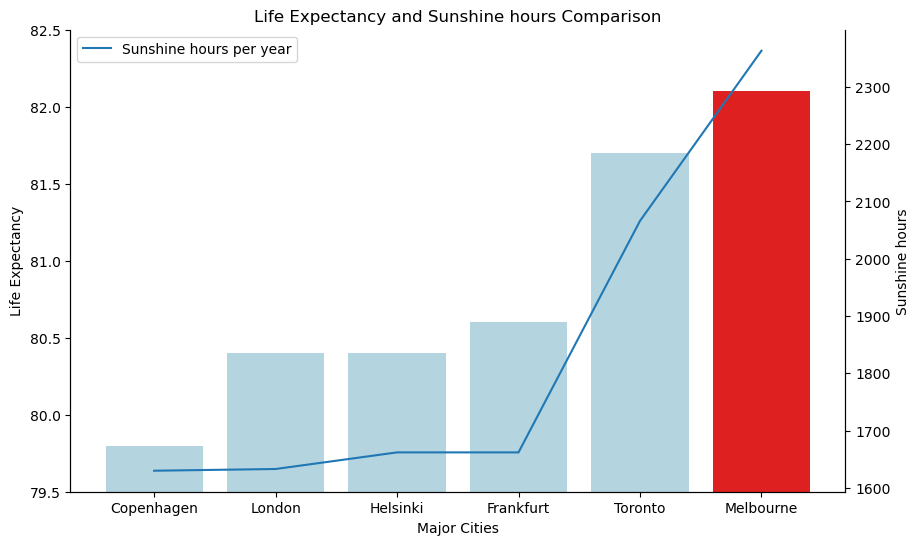

In [13]:
Melbourne = cities[cities["City"] == "Melbourne"]
Melbourne
cherry = cities.iloc[[10,37, 18, 5,4,14], :]
cherry = cherry.sort_values("Life expectancy(years) (Country)")
cherry["Sunshine hours"] = cherry["Sunshine hours(City)"]

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(10,6))

colours = []
for i in range(0,len(cherry)):
    if i <len(cherry)-1:
        colours.append("LightBlue")
    else:
        colours.append("Red")
        
plot = sns.barplot(data = cherry,x = "City" , y = "Life expectancy(years) (Country)",palette=colours,ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = cherry, x = "City" , y = "Sunshine hours",ax = ax2)

plot.axes.set_ylim(79.5,82.5)
plot.set(xlabel='Major Cities', ylabel='Life Expectancy')
plot.set_title("Life Expectancy and Sunshine hours Comparison")

plt.legend(labels=["Sunshine hours per year"])
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

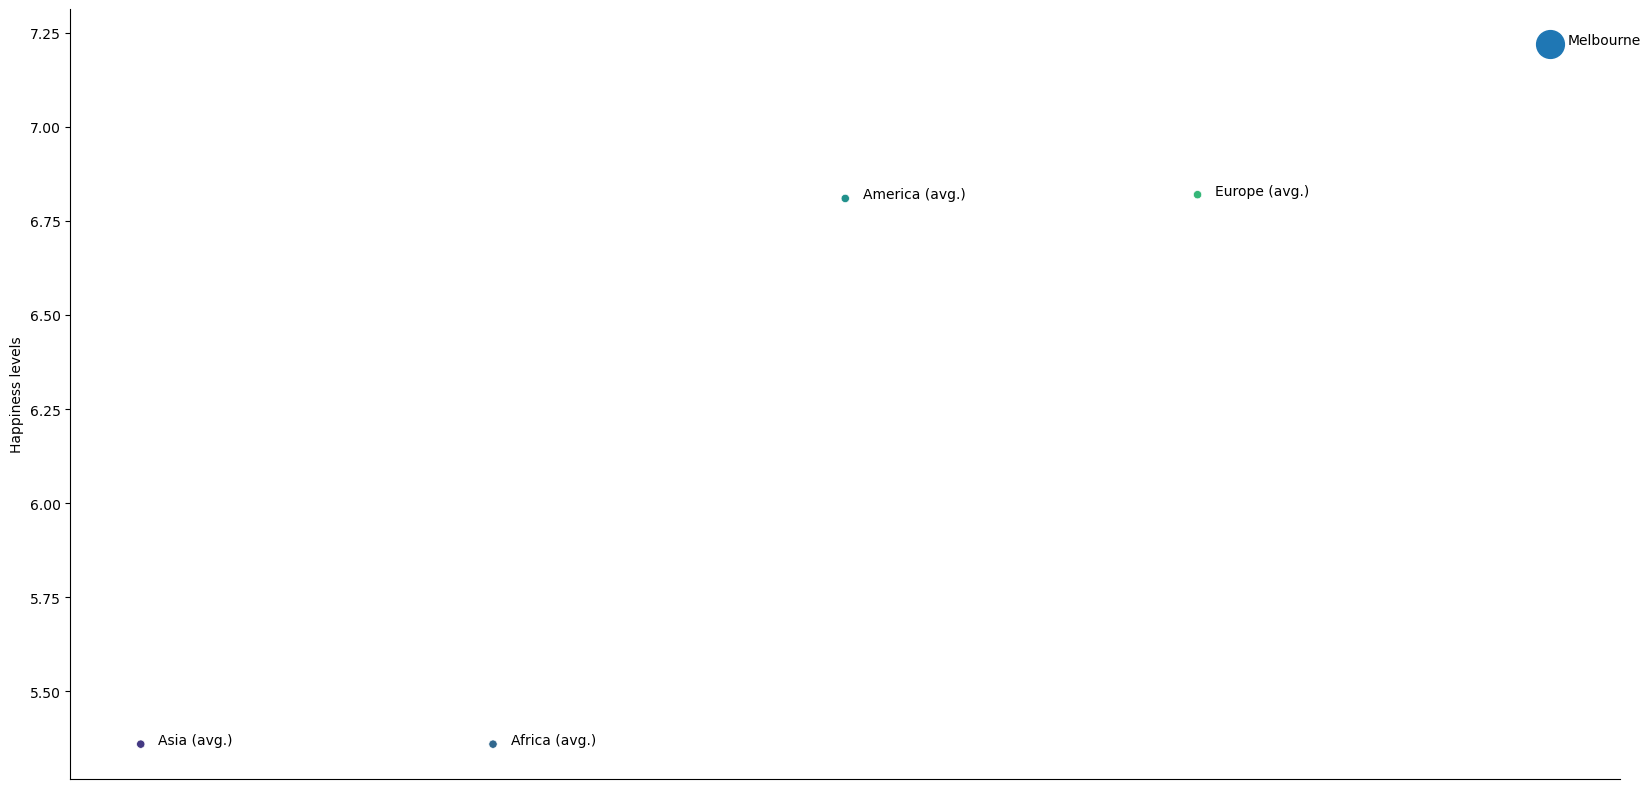

In [14]:
d = {"Geographic Area":["Asia (avg.)", "Africa (avg.)", "America (avg.)", "Europe (avg.)", "Melbourne"], "Happiness levels": [5.36, 5.36, 6.81, 6.82, 7.22], "marker_size":[10,10,50,50,500]}
df = pd.DataFrame(data=d)

plt.figure(figsize=(20,10))
figure = sns.scatterplot(x=df.index, y=df["Happiness levels"], hue=df["Geographic Area"], sizes=[5,5,10,10,10000], palette="viridis", legend=False)

for row in range(0,len(df)):
    figure.text(row+0.05, df.iloc[row][1], df.iloc[row][0])
    
figure.plot(4,df.iloc[4][1], marker="o", markersize=20)

figure.axes.get_xaxis().set_visible(False)
figure.spines["top"].set_visible(False)
figure.spines["right"].set_visible(False)

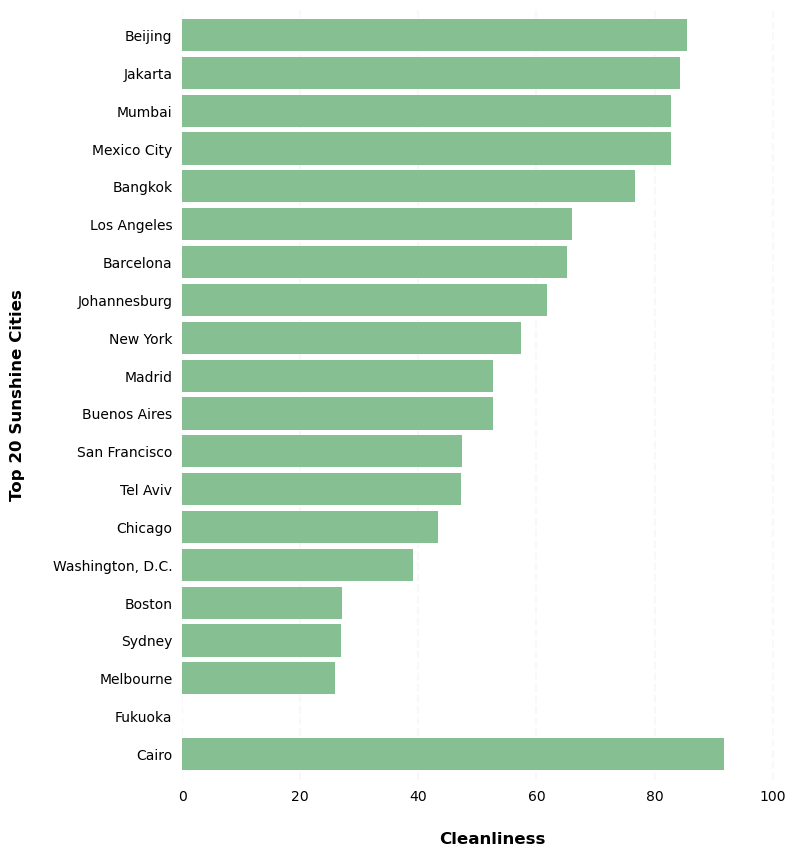

In [15]:
from matplotlib.ticker import StrMethodFormatter
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


#Research what Data to take


BofWo= cities.sort_values(by='Cost of a bottle of water(City)', ascending=True).reset_index().drop('index', axis=1)
#BofWo
#Melbourne #32

ObLev= cities.sort_values(by='Obesity levels(Country)', ascending=True).reset_index().drop('index', axis=1)
#ObLev
#Melbourne #34

LExp= cities.sort_values(by='Life expectancy(years) (Country)', ascending=False).reset_index().drop('index', axis=1)
#LExp
#Melbourne #9


PolX= cities.sort_values(by='Pollution(Index score) (City)', ascending=True).reset_index().drop('index', axis=1)
#PolX
#Melbourne #8


AnWH= cities.sort_values(by='Annual avg. hours worked', ascending=True).reset_index().drop('index', axis=1)
#AnWH

#20

HapLev= cities.sort_values(by='Happiness levels(Country)', ascending=False).reset_index().drop('index', axis=1)
#HapLev

#10


OutAct= cities.sort_values(by='Outdoor activities(City)', ascending=False).reset_index().drop('index', axis=1)
#OutAct

#14



TakeOut= cities.sort_values(by='Number of take out places(City)', ascending=False).reset_index().drop('index', axis=1)
#TakeOut

#26

GymMem= cities.sort_values(by='Cost of a monthly gym membership(City)', ascending=True).reset_index().drop('index', axis=1)
#GymMem

#21


#cities['Sunshine x Happiness'] = cities['Sunshine hours(City)'] * cities['Happiness levels(Country)']
#cities


#GymMemVSWa= cities.sort_values(by='Gym Membership Cost in Waterbottles', ascending=True).reset_index().drop('index', axis=1)
#GymMemVSWa

#21



sunshine= cities.sort_values(by='Sunshine hours(City)', ascending=False).reset_index().drop('index', axis=1)
#sunshine
#Melbourne #20



Top20_Sun_sort_by_Polution =sunshine.head(20).sort_values('Pollution(Index score) (City)').reset_index()

Top20_Sun_sort_by_Happiness = sunshine.head(20).sort_values('Happiness levels(Country)', ascending = False).reset_index().drop(['index'], axis=1)


Top20_Sun_sort_by_Polution['Pollution(Index score) (City) reversed'] = 100-Top20_Sun_sort_by_Polution['Pollution(Index score) (City)'].replace(r'-', np.nan).astype(float)

#Short Sketch

#Top20_Sun_sort_by_Polution.set_index('City')['Pollution(Index score) (City) reversed'].iloc[::-1].replace(r'-', np.nan).astype(float).plot.barh(y = 'Pollution(Index score) (City)' )



#Make Graph Nice


x=Top20_Sun_sort_by_Polution.set_index('City')['Pollution(Index score) (City) reversed'].append(Top20_Sun_sort_by_Polution.set_index('City')['Pollution(Index score) (City) reversed'].iloc[0:1:]).iloc[:0:-1]

ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

plt.tick_params(axis = "x", which = "both", bottom = False, top = False, left = False)
plt.tick_params(axis = "y", which = "both", left = False)

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Cleanliness", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Top 20 Sunshine Cities", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

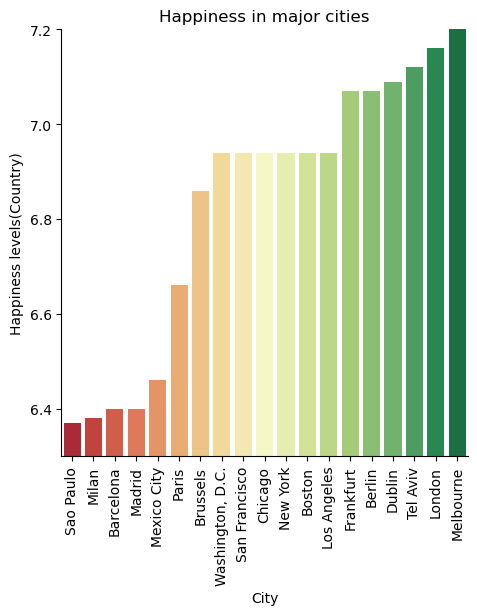

In [16]:
import warnings
warnings.filterwarnings("ignore")
col="Happiness levels(Country)"
vals = cities.loc[(cities["Happiness levels(Country)"] >= 6.3) & (cities["Happiness levels(Country)"] <= 7.3)]
vals[col] = pd.to_numeric(vals[col], errors='coerce')
vals = vals.sort_values(col, ignore_index=True)
ax = sns.catplot(data=vals.iloc[:-4,:], x="City", y=col, kind="bar", palette='RdYlGn').set(title='Happiness in major cities')
ax.set(ylim=(6.3, 7.2))
ax.set_xticklabels(rotation=90)

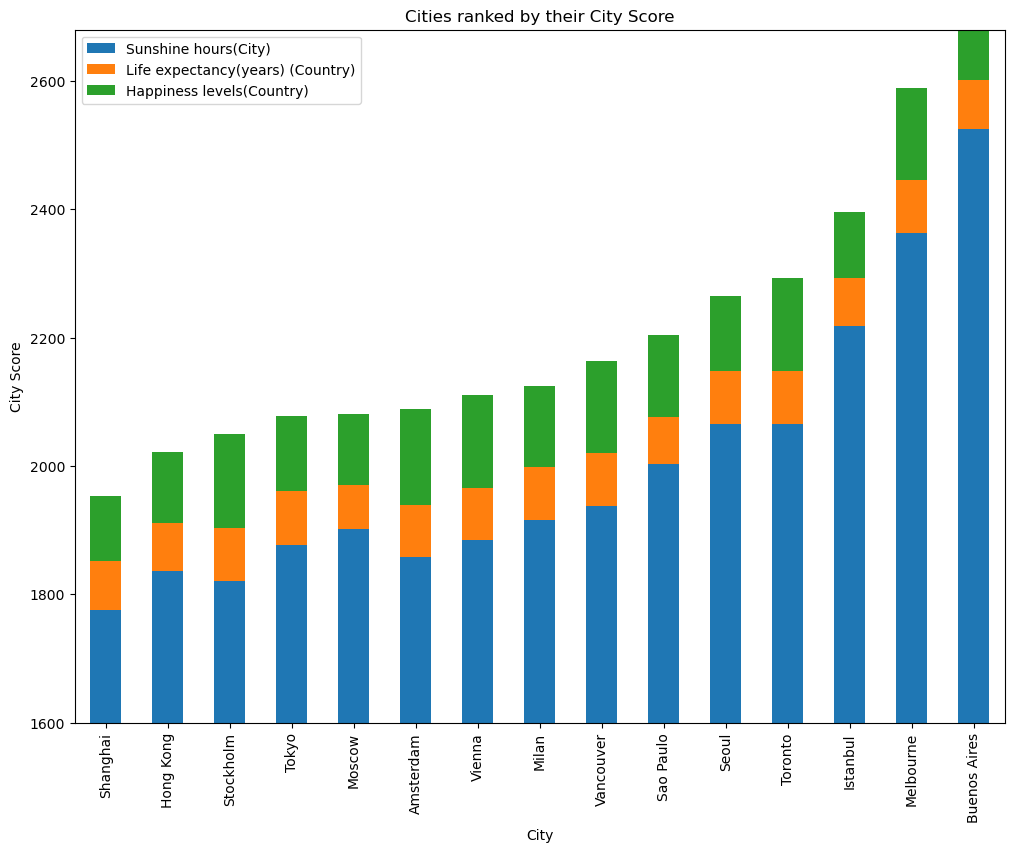

In [17]:
small = cities[["City",'Sunshine hours(City)','Life expectancy(years) (Country)',"Happiness levels(Country)","Pollution(Index score) (City)"]]
small["Sum"]=small['Sunshine hours(City)']+small["Life expectancy(years) (Country)"]+20*small["Happiness levels(Country)"]
small["Happiness levels(Country)"]=small["Happiness levels(Country)"]*20
small=small.sort_values(by="Sum")
small=small[10:-19]

fig=small.plot(x="City",ylabel="City Score",ylim=[1600,2680],title="Cities ranked by their City Score",y=['Sunshine hours(City)','Life expectancy(years) (Country)',"Happiness levels(Country)"],kind='bar',stacked=True,figsize=(12,9))
#The units are not even the same but i dont have to be constrained by such arbitrary concepts 

Continent
Africa       23.215000
America      49.307273
Asia         32.858000
Australia    73.620000
Europe       57.617222
Name: Pollution Means, dtype: float64
           Happiness Means  Pollution Means
Continent                                  
Africa            4.480000        23.215000
America           6.809091        49.307273
Asia              5.494545        32.858000
Australia         7.220000        73.620000
Europe            6.911111        57.617222


Text(4, 10    74.1
Name: Pollution(Index score) (City), dtype: float64, '      Melbourne Pollution Index')

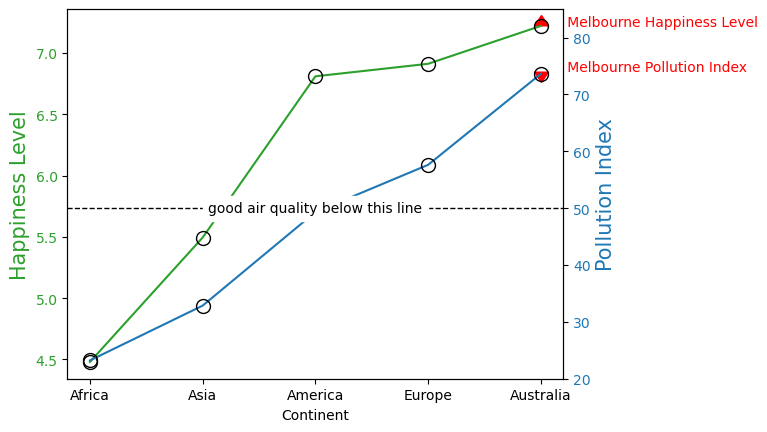

In [18]:
import matplotlib.ticker as ticker

# Put your plot here
happiness = cities[["Continent", 'Happiness levels(Country)']].rename(columns = {'Happiness levels(Country)':'Happiness Means'})
happiness_means = happiness.groupby('Continent')['Happiness Means'].mean()
#print(happiness)

#cities_means = pd.merge(left=cities, right=happiness_means,how="left", on = "Continent")

cities['Pollution(Index score) (City)'] = cities['Pollution(Index score) (City)'].replace("-", np.nan)
cities['Pollution(Index score) (City)'] = cities['Pollution(Index score) (City)'].astype(float)
pollution = cities[["Continent", 'Pollution(Index score) (City)']].rename(columns = {'Pollution(Index score) (City)':'Pollution Means'})
pollution_means = pollution.groupby('Continent')['Pollution Means'].mean()
print(pollution_means)

happiness_pollution = pd.merge(left=happiness_means, right = pollution_means, on="Continent")
print(happiness_pollution)
cities_means = pd.merge(left=cities, right = happiness_pollution, on="Continent")

#ax = plt.gca()
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Continent')
ax1.set_ylabel('Happiness Level', color = color, size=15)
happiness_pollution.sort_values(by="Happiness Means").plot(y="Happiness Means", 
                                                             legend=False, ax=ax1,
                                                          color = color,
                                                           marker ="o",
                                                   #        markeredgewidth=10,
                                                           markersize=10,
                                                          markeredgecolor='black',
                                                          markerfacecolor = "none")
ax1.tick_params(axis='y', labelcolor=color)

melbourne_h = cities.loc[cities['City'] == "Melbourne", 'Happiness levels(Country)']
plt.scatter(x=4, y=melbourne_h, color = "r", marker=10, s=100)


#ax1.plt.annotate("Melbourne",(continent_melbourne, melbourne))
#cities.loc[cities['City'] == "Melbourne", 'Happiness levels(Country)'].plot(ax = ax1, color = "c")


ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_xlabel('Continent')
ax2.set_ylabel('Pollution Index', color = color, size=15)
happiness_pollution.sort_values(by="Happiness Means").plot(y="Pollution Means", 
                                                           legend=False, ax=ax2,
                                                          color = color,
                                                          marker ="o",
                                                        #   markeredgewidth=10, 
                                                           markersize=10,
                                                          markeredgecolor='black',
                                                          markerfacecolor = "none")
ax2.tick_params(axis='y', labelcolor=color)

plt.ylim((20,85))

ax2.set_xticks([0, 1, 2, 3, 4])
#tick_spacing = log(yaxis)
#ax2.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.axhline(50, color='black', linewidth=1, linestyle ="--") # horizontal line
plt.text(2, 50, 'good air quality below this line', fontsize=10, va='center', ha='center', backgroundcolor='w')

melbourne_p = cities.loc[cities['City'] == "Melbourne", 'Pollution(Index score) (City)']
plt.scatter(x=4, y=melbourne_p, color="r", marker = 11,  s=100)


ax1.annotate("      Melbourne Happiness Level", (4, melbourne_h), color="r")
ax2.annotate("      Melbourne Pollution Index", (4, melbourne_p), color ="r")


#why doesn't this work:
#cities_means.groupby("Continent")["Happiness Means"].plot(legend=True, ax =ax)


# YOUR CODE HERE
#raise NotImplementedError()

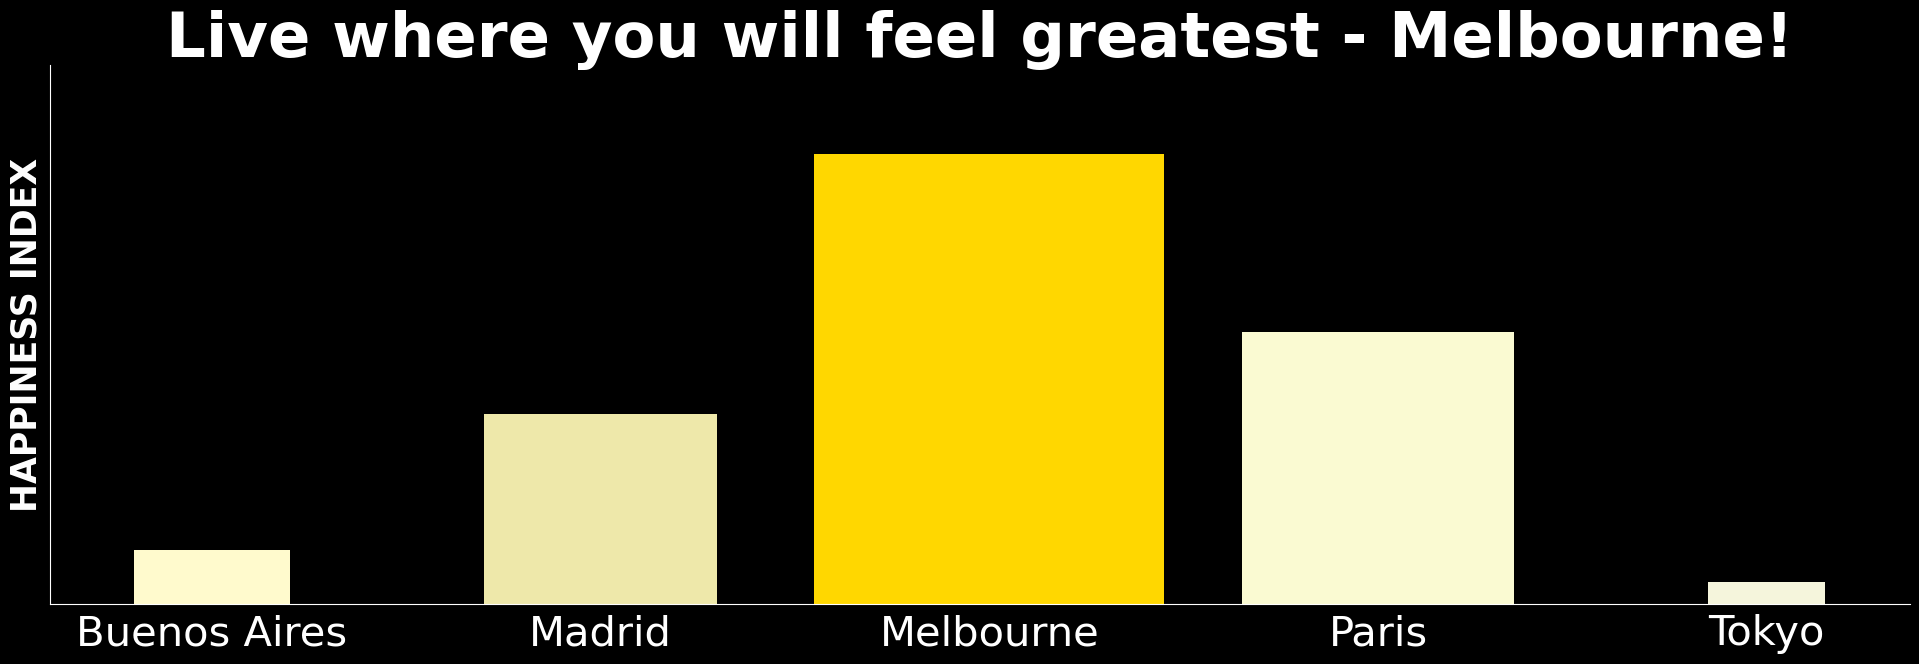

In [19]:
plt.style.use('dark_background')  
fig, ax = plt.subplots(figsize=(24, 7))


plt.bar([ cities["City"][13],cities["City"][15],cities["City"][10],cities["City"][34],cities["City"][28]] , 
        [cities["Happiness levels(Country)"][13],cities["Happiness levels(Country)"][15],cities["Happiness levels(Country)"][10],cities["Happiness levels(Country)"][34],cities["Happiness levels(Country)"][28]],
       width = [0.4,0.6,0.9,0.7,0.3],#[1.1,0.6,1.3,0.7,0.5],
       color = ['lemonchiffon','palegoldenrod',  'gold','lightgoldenrodyellow', 'beige'],
        bottom = None)

plt.ylim(5.8,7.5)
plt.title('Live where you will feel greatest - Melbourne!', fontsize = 45,fontweight='black')
plt.ylabel('HAPPINESS INDEX', fontsize = 25, fontweight='black')
#plt.xlabel('why would you live somewhere else?', fontsize = 25, fontweight='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                bottom = False)

plt.xticks(fontsize=30)

plt.show()

'life: 78.17500000000004'

'mel_life: 82.1'

'---'

'pol: 48.877674418604656'

'mel_pol: 74.1'

'---'

'happi: 6.435000000000001'

'mel_happi: 7.22'

'---'

'ac: 213.97727272727272'

'mel_ac: 243.0'

'---'

'gym: 40.42000000000001'

'mel_gym: 36.89'

'---'

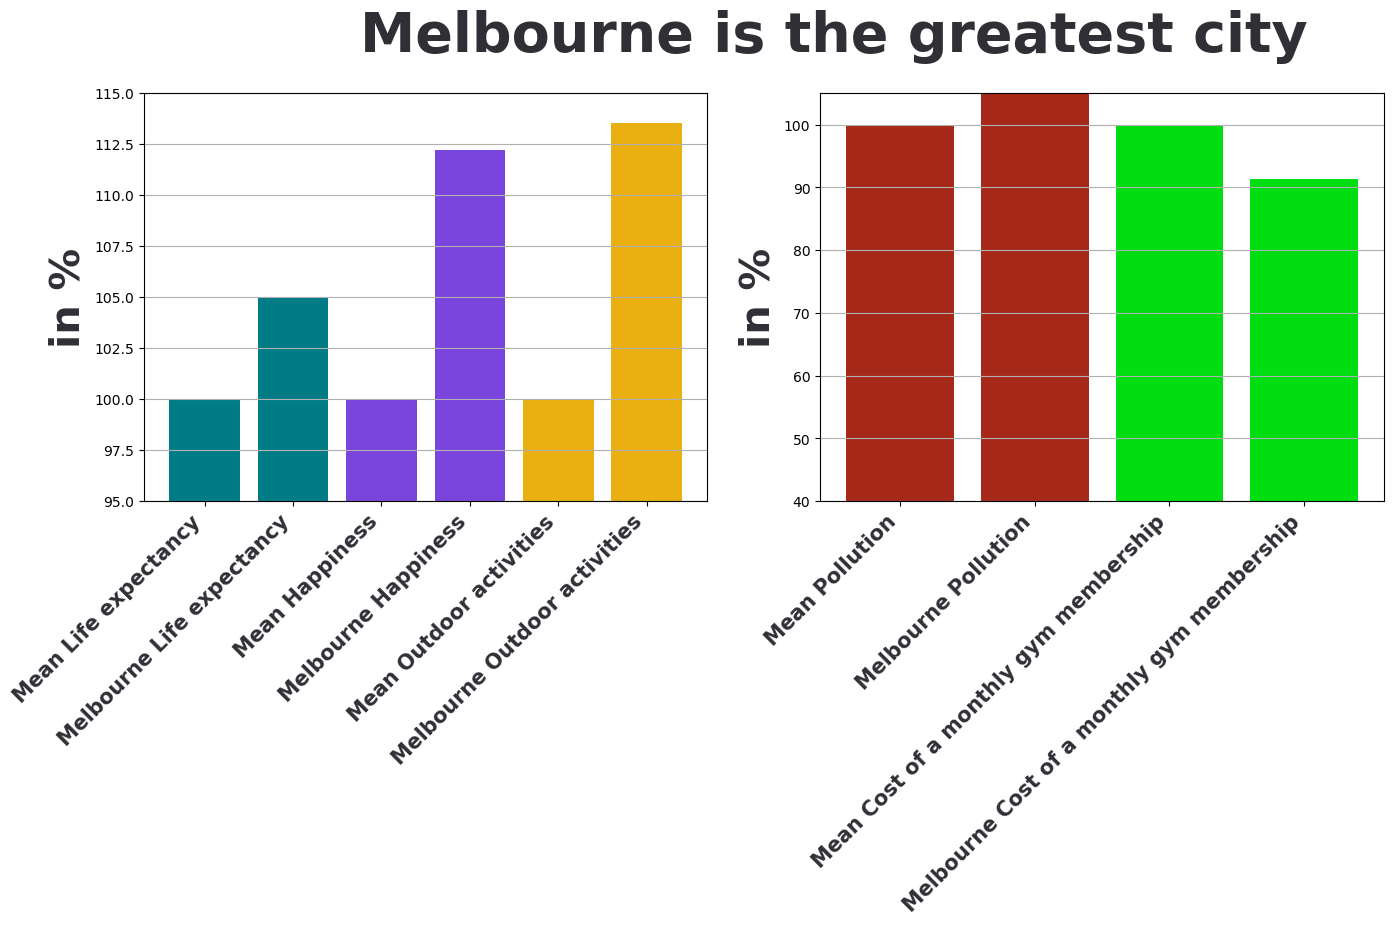

In [20]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

x = ["Sunshine hours(City)","Cost of a bottle of water(City)","Obesity levels(Country)","Life expectancy(years) (Country)","Pollution(Index score) (City)","Annual avg. hours worked","Happiness levels(Country)","Outdoor activities(City)","Number of take out places(City)","Cost of a monthly gym membership(City)"]

mean_life = cities["Life expectancy(years) (Country)"].mean()
display("life: " + str(mean_life))
mel_life = (cities[cities["City"] == "Melbourne"])["Life expectancy(years) (Country)"].astype(float).values[0]
display("mel_life: " + str(mel_life))
display("---")

mean_pol = (((cities[cities["Pollution(Index score) (City)"] != "-"])["Pollution(Index score) (City)"]).astype(float)).mean()
display("pol: " + str(mean_pol))
mel_pol = (cities[cities["City"] == "Melbourne"])["Pollution(Index score) (City)"].astype(float).values[0]
display("mel_pol: " + str(mel_pol))
display("---")

mean_happi = (((cities[cities["Happiness levels(Country)"] != "-"])["Happiness levels(Country)"]).astype(float)).mean()
display("happi: " + str(mean_happi))
mel_happi = (cities[cities["City"] == "Melbourne"])["Happiness levels(Country)"].astype(float).values[0]
display("mel_happi: " + str(mel_happi))
display("---")

mean_ac = (((cities[cities["Outdoor activities(City)"] != "-"])["Outdoor activities(City)"]).astype(float)).mean()
display("ac: " + str(mean_ac))
mel_ac = (cities[cities["City"] == "Melbourne"])["Outdoor activities(City)"].astype(float).values[0]
display("mel_ac: " + str(mel_ac))
display("---")

mean_gym = (((cities[cities["Cost of a monthly gym membership(City)"] != "-"])["Cost of a monthly gym membership(City)"]).astype(float)).mean()
display("gym: " + str(mean_gym))
mel_gym = (cities[cities["City"] == "Melbourne"])["Cost of a monthly gym membership(City)"].astype(float).values[0]
display("mel_gym: " + str(mel_gym))
display("---")

mel_life = (mel_life/mean_life) *100
life = 100

mel_pol = (mel_pol/mean_pol) *100
pol = 100

mel_happi = (mel_happi/mean_happi) *100
happi = 100

mel_ac = (mel_ac/mean_ac) *100
ac = 100

mel_gym = (mel_gym/mean_gym) *100
gym = 100

x1 = ["Mean Life expectancy","Melbourne Life expectancy"]
x2 = ["Mean Pollution","Melbourne Pollution"]
x3 = ["Mean Happiness","Melbourne Happiness"]
x4 = ["Mean Outdoor activities","Melbourne Outdoor activities"]
x5 = ["Mean Cost of a monthly gym membership","Melbourne Cost of a monthly gym membership"]

y1 = [life,mel_life]
y2 = [pol,mel_pol]
y3 = [happi,mel_happi]
y4 = [ac,mel_ac]
y5 = [gym,mel_gym]

left_labs = x1 + x3 + x4
right_labs = x2 + x5

fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].bar(x1, y1, align="center", color="#007C87", alpha=1)
ax[1].bar(x2, y2, align="center", color="#A52819", alpha=1)
ax[0].bar(x3, y3, align="center", color="#7945DD", alpha=1)
ax[0].bar(x4, y4, align="center", color="#EAAF11", alpha=1)
ax[1].bar(x5, y5, align="center", color="#00DD11", alpha=1)
ax[0].set_ylim([95,115])
ax[1].set_ylim([40,105])
#ax.set_title("Melbourne is the greatest city", fontsize = 15, fontweight='black', color = '#333F4B')
fig.text(0.26, 0.95, "Melbourne is the greatest city", fontweight="bold", fontsize=40, color="#2F2F36")
ax[0].grid(axis="y")
ax[1].grid(axis="y")
ax[0].set_ylabel("in %", fontweight="bold", fontsize=30, color="#2F2F36")
ax[1].set_ylabel("in %", fontweight="bold", fontsize=30, color="#2F2F36")
ax[0].set_xticklabels(left_labs, fontweight="bold", fontsize=15, color="#2F2F36")
#ax[0].set_yticks(fontweight="bold", fontsize=110, color="#2F2F36")
ax[1].set_xticklabels(right_labs, fontweight="bold", fontsize=15, color="#2F2F36")
fig.autofmt_xdate(rotation=45)
plt.show()

Text(0.5, 1.0, 'MELBOURNE:\n Live a Long and Happy Life!')

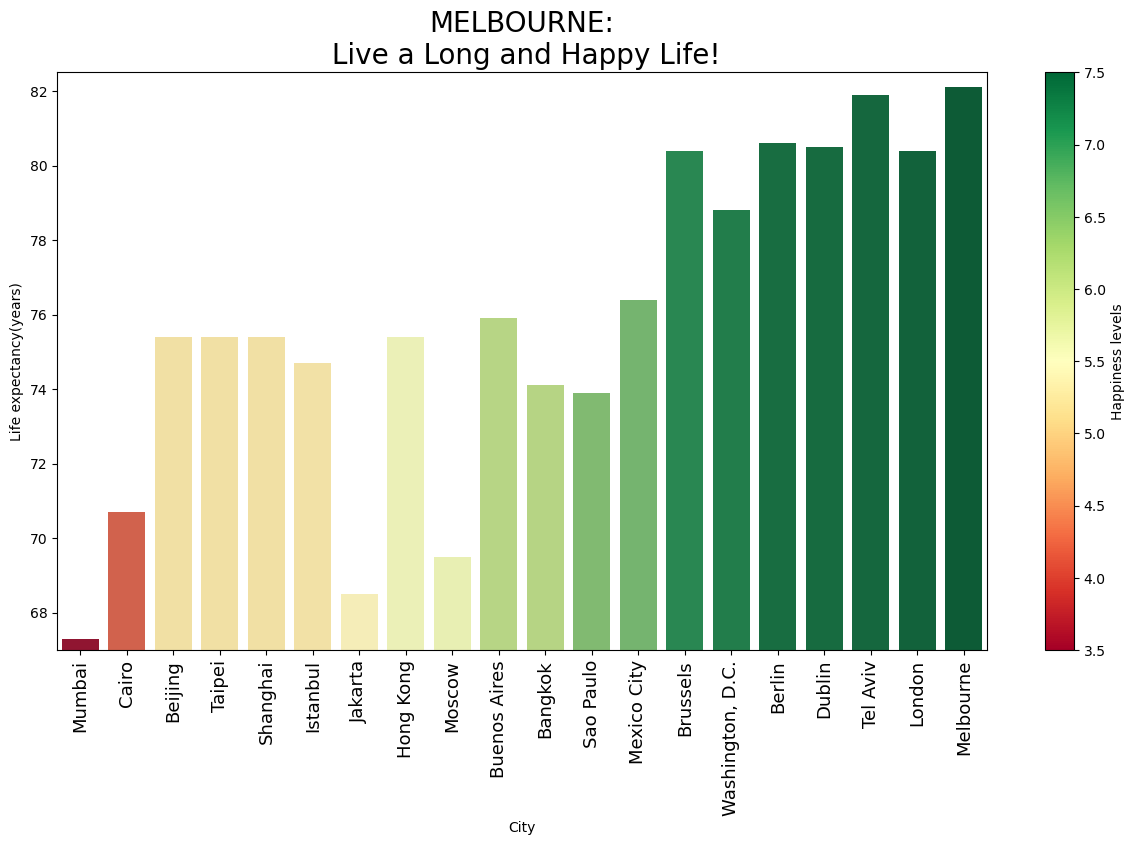

In [21]:
cities = cities.sort_values("Life expectancy(years) (Country)", ignore_index=True)
cp = cities.head(cities[cities['City']=="Melbourne"].index.item()+1)
cp = cp.sort_values("Happiness levels(Country)", ignore_index=True)
cp = cp.head(cp[cp['City']=="Melbourne"].index.item()+1)
cp = cp.drop(index=[2,10, 15,17, 18, 19, 20, 21, 23])

# Heatmap
norm = plt.Normalize(cp["Happiness levels(Country)"].values.min(), cp["Happiness levels(Country)"].values.max())
colors = plt.cm.RdYlGn(norm(cp["Happiness levels(Country)"])) 

plt.show()

plt.figure(figsize=(15,7.5))
xy = range(3, 7)
sc = plt.scatter(xy, xy, c=xy, vmin=3.5, vmax=7.5, s=35, cmap=plt.cm.get_cmap('RdYlGn'))
plt.clf()
cbar = plt.colorbar(sc)
cbar.set_label("Happiness levels")
ax = sns.barplot(data = cp, x="City", y="Life expectancy(years) (Country)", palette=colors)
ax.set(ylim=(67, 82.5))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize=13)
ax.set_ylabel("Life expectancy(years)")
ax.set_title("MELBOURNE:\n Live a Long and Happy Life!", fontsize=20)


# DESCRIPTION OF MY PLOT
# I cherry picked the data so that I melbourne has the highest life expectancy and happiness levels of all cities in the remaining set.
# In the plot are the axis chosen so that the differences between the cities look extra high.

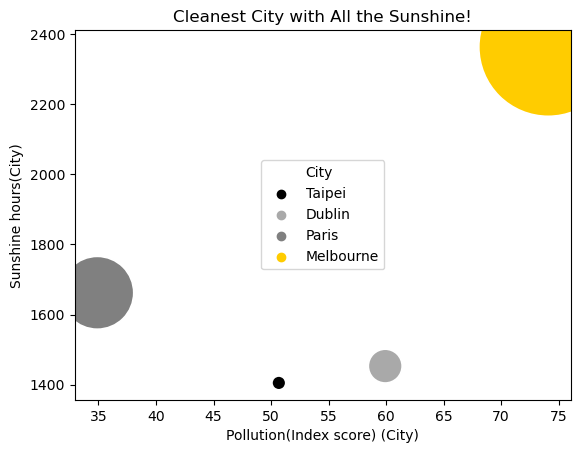

In [30]:
melbourneGood = cities[cities['City'].isin(['Dublin','Melbourne','Paris','Taipei'])][['City','Sunshine hours(City)','Pollution(Index score) (City)']]
g =sns.scatterplot(data = melbourneGood,
                x = 'Pollution(Index score) (City)',
                y='Sunshine hours(City)',
                size = 'Sunshine hours(City)',
                sizes = (100,10000),
                hue = 'City',
                #palette = ('#ffcc00','Black','Gray','Darkgrey'),
                palette = ('Black', 'Darkgrey', 'Gray', '#ffcc00')
    )
g.set_title('Cleanest City with All the Sunshine!')
h,l = g.get_legend_handles_labels()
plt.legend(h[0:],l[0:5],loc = 'center')

## 3 (2 points)
### 3a (2 points)
Where did this data even come from? Find one instance where a data point in the cities dataframe is false. Write one sentence explaining why it is false and provide a source proving your claim.

Data points that are false:
- Missing sunshine hours for Geneva
- Sunshine hours in Fukuoka should be lower
- Life expectancy for South Africa, India and China should be higher
- Cost of water in Geneva, Berlin, Zurich should be lower
- Outdoor Activities is a weird category, how would you measure it? Clearly false for some places, e.g. Frankfurt
- Outdoor Activities and Number of Takeoutplaces comes from Tripadvisor, but it's not used in some places, e.g. China
- Prices are in local currency, FX Fluctuations change Data
- Obesity in Switzerland is wrong


One student answer:

Kaggle has the data from: https://www.lenstore.co.uk/research/healthy-lifestyle-report/ If we go to the bottom of the page we see the sources Lenstore used. For the cost of the bottle of water they probably used https://www.numbeo.com/cost-of-living/ Let's take a look on Zurich(£3.20) and Fukuoka(£0.78). On the website we find two different values for the cost of water, one is for a 0.33L bottle in a restaurant and the other for a 1.5L bottle in a supermarket. For Zurich we find that in a restaurant a bottle costs £3.20 while in a supermarket a bottle costs £1.00. For Fukuoka we have £0.64 in a restaurant and £0.78 in a supermarket. So Lenstore just took the higher price even though these are from two different categories and compared them. It would make more sense to just look at one of both categories and compare these prices than mix the prices of both categories.